# Random Forest Case Study

### Breast Cancer Data

In [1]:

##########################################

# Step 1: Data gathering

# Step 2: Feature Engineering

# Missing value treatment
# Outliers treatment
# Dealing with Categorical variables
# Handling of Imbalanced data set
# Normalization and Scaling

# Step 3: Feature Selection

# Heat Map
# Correlation test
# PCA

# Step 4: Model Building

# Which algorithm to use?
# Checking the Accuracy for the Training and Testing data set

# Step 5: Hyperparameter Optimization

# Overfitting (High Accuracy for Training data and Low Accuracy for Test data) 
# ---> Regularization techniques(Ridge L2, Lasso L1, Elastic Net) or Hyperparameter optimization

# Checking the Accuracy

# Try with different ML Algorithms and Select the Final Model

# Step 6: Project Deployment and Monitoring



# =============================================================================
# Setting the Environment
# =============================================================================
import os
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier 
from urllib.request import urlopen 
from pylab import rcParams
import warnings
from sklearn import metrics, preprocessing, tree

In [2]:
plt.style.use('ggplot')
pd.set_option('display.max_columns', 500) 


In [3]:
os.chdir('D:/MLP_Session_26_JULY/DATASET')

In [4]:
data = pd.read_csv('RF_data.csv')

In [5]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
# Removing the 'id' column

data1 = data.drop(columns = ['id']) 


In [7]:
data1

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [8]:
# Converting the text data into numeric form using map function

data1['diagnosis'] = data1['diagnosis'].map({'M':1, 'B':0})

In [9]:
data1.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [10]:
# Checking for Missing Values

data1.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [11]:
# EDA

data1.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [12]:
data1.shape

(569, 31)

In [13]:
data1.dtypes

diagnosis                    int64
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

In [14]:
# Creating separate dataset for independent and dependent variables 

X = data1.iloc[:, data1.columns != 'diagnosis']
Y = data1.iloc[:, data1.columns == 'diagnosis']

In [15]:
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [16]:
Y.head()

,diagnosis
0,1
1,1
2,1
3,1
4,1


In [17]:
# Splitting the data into train and test sets

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.20, random_state = 0)

In [18]:
X_train.shape

(455, 30)

In [19]:
X_test.shape

(114, 30)

In [20]:
Y_train.shape

(455, 1)

In [21]:
Y_test.shape

(114, 1)

In [22]:
# Cleaning Y_train and Y_test to avoid future warning messages

Y_train = Y_train.values.ravel() 
Y_test = Y_test.values.ravel() 

In [23]:
# Fitting the Random Forest Model
# =============================================================================


# Important hyperparameters in Random Forest Model

# n_estimators ---> number of decision trees to consider

# max_depth ---> The vertical depth 

# bootstrap ---> An indicator of whether or not we want to use bootstrap samples when building trees.
# By default bootstrap = True 

# max_features ---> The maximum number of features that will be used in node splitting 

# criterion --> gini or entropy --> This is the metric used to asses the stopping criteria for the decision trees.
    
# random state -->  for reproducibility i.e same set of random numbers

fit_rf = RandomForestClassifier(random_state=0)

In [47]:
# Fitting the model

fit_rf.fit(X_train, Y_train)

RandomForestClassifier(random_state=0)

In [48]:
# Accuracy of the training data

fit_rf.score(X_train, Y_train) 

1.0

In [49]:
# Predicting the model

fit_rf_pred=fit_rf.predict(X_test)

In [50]:
# Accuracy for the test data

accuracy_score(Y_test, fit_rf_pred) 

0.9649122807017544

In [51]:
#  Hyperparameters Optimization 

# Giving different hyperparameter combination and using GridSearchCV

param_dist = {'max_depth': [2, 3, 4],
              'max_features': ['auto', 'sqrt', 'log2', None],
              'criterion': ['gini', 'entropy']}

cv_rf = GridSearchCV(fit_rf, cv = 10,
                     param_grid=param_dist)

In [52]:
# Fitting the model using GridSearchCV

best_cl=cv_rf.fit(X_train, Y_train)

In [53]:
# Optimal combination of parameters

best_fit_rf=best_cl.best_params_

In [54]:
best_fit_rf  

{'criterion': 'gini', 'max_depth': 4, 'max_features': 'log2'}

In [56]:
print('Best Parameters using grid search:' , 
      cv_rf.best_params_)

Best Parameters using grid search: {'criterion': 'gini', 'max_depth': 4, 'max_features': 'log2'}


In [57]:
# Setting the best parameters given by grid search 

fit_rf.set_params(criterion = 'gini',
                  max_features = 'log2', 
                  max_depth = 4)


RandomForestClassifier(max_depth=4, max_features='log2', random_state=0)

In [58]:
# Out of Bag Score and Out of Bag Error Rate (OOB)

# Another useful feature of random forest is the concept of an out-of-bag (OOB) error rate. 

# It can be shown that only 2/3 rd of the data are used to training each tree when building the forest,
# and 1/3 rd of the data is not used for fitting purpose.
# So, 1/3 rd of this data is known as Out of Bag observations
# So for each test data set in 1/3 rd observations, we get the prediction

# So in calculating OOB Score, we don't require the Validation set

# OOB Error is given by --->  OOB Error = 1 - OOB Score

# Here OOB helps to find the Optimal number of Decision Trees to be used in the RF model

# The number of trees for which the OOB Error rate is minimum is chosen as the optimal number of trees

# Uses: OOB Score is used when the data set is small and splitting the data into train and test 
# is taking away useful data and can be used to train the model.


# Creating a series of error rate for different n_estimators (i.e no. of Decision Trees)

# To find the optimal number of Decision trees

# Here we have used a for loop to calculate the OOB Error rate for different numbers of Decision Trees
# starting from 15 to 1000

fit_rf.set_params(oob_score=True)

min_estimators = 15
max_estimators = 1000

error_rate = {}

for i in range(min_estimators, max_estimators + 1):
    fit_rf.set_params(n_estimators=i)
    fit_rf.fit(X_train, Y_train)

    oob_error = 1 - fit_rf.oob_score_
    error_rate[i] = oob_error

Text(0.5, 1.0, 'OOB Error Rate Across various Forest sizes /n(From 15 to 1000 trees)')

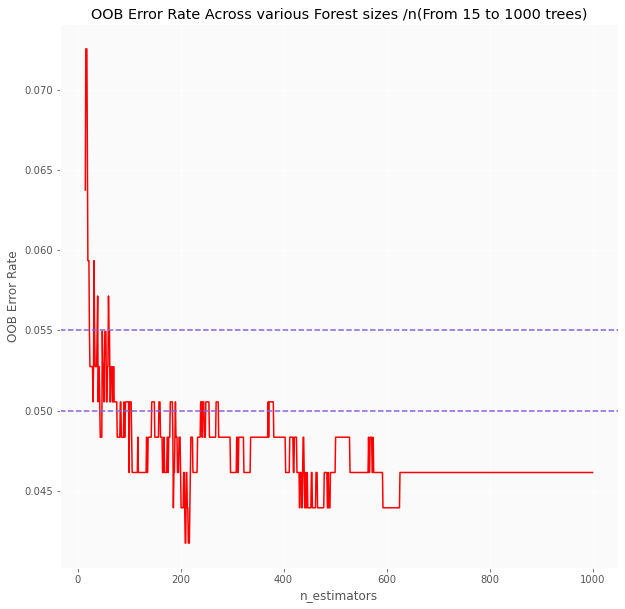

In [59]:
# Convert dictionary to a pandas series for easy plotting 

oob_series = pd.Series(error_rate)


fig, ax = plt.subplots(figsize=(10, 10))

ax.set_facecolor('#fafafa')

oob_series.plot(kind='line',
                color = 'red')
plt.axhline(0.055, 
            color='#875FDB',
           linestyle='--')
plt.axhline(0.05, 
            color='#875FDB',
           linestyle='--')
plt.xlabel('n_estimators')
plt.ylabel('OOB Error Rate')
plt.title('OOB Error Rate Across various Forest sizes /n(From 15 to 1000 trees)')


In [60]:
# The OOB error rate starts to stabilize at around 400 trees, 
# So here we will use 400 trees in the Random Forest. 

# Using the `pandas` series object we can easily 
# find the OOB error rate for the estimator as follows:


print('OOB Error rate for 400 trees is: {0:.5f}'.format(oob_series[400]))


OOB Error rate for 400 trees is: 0.04835


In [61]:
# Traditional Training and Test Set Split using 400 decision trees obtained from above code

fit_rf.set_params(n_estimators=400,
                  bootstrap = True,
                  
                  oob_score=False)


RandomForestClassifier(max_depth=4, max_features='log2', n_estimators=400,
                       random_state=0)

In [62]:
# Fitting the model with n_estimators(i.e. no. of decision trees) as 400

fit_rf.fit(X_train, Y_train)

RandomForestClassifier(max_depth=4, max_features='log2', n_estimators=400,
                       random_state=0)

In [64]:
# Calculating the feature importance

feature_imp = fit_rf.fit(X_train,Y_train).feature_importances_
feature_imp

array([0.03361121, 0.01344635, 0.05470227, 0.03238874, 0.0055888 ,
       0.02197684, 0.06597162, 0.09726918, 0.00367907, 0.00321868,
       0.0265214 , 0.00294846, 0.01997067, 0.04128807, 0.00233168,
       0.0040358 , 0.0064396 , 0.00692925, 0.00321879, 0.00346356,
       0.10680462, 0.01574573, 0.11983465, 0.1047888 , 0.00914903,
       0.01637703, 0.03336107, 0.1276274 , 0.00978686, 0.00752477])

In [65]:
# Arranging the feature importance relative to the max importance

feature_imp = 100.0 * (feature_imp/feature_imp.max())

feature_imp

array([ 26.33541861,  10.53563224,  42.86091261,  25.37757685,
         4.37899659,  17.21952856,  51.69079174,  76.21339954,
         2.8826621 ,   2.52193715,  20.78033691,   2.31020846,
        15.64763498,  32.35047253,   1.82694459,   3.16217216,
         5.04562608,   5.4292805 ,   2.52202096,   2.71380861,
        83.68470446,  12.33726098,  93.89414105,  82.10525262,
         7.16854297,  12.83191038,  26.13942666, 100.        ,
         7.66830244,   5.89588636])

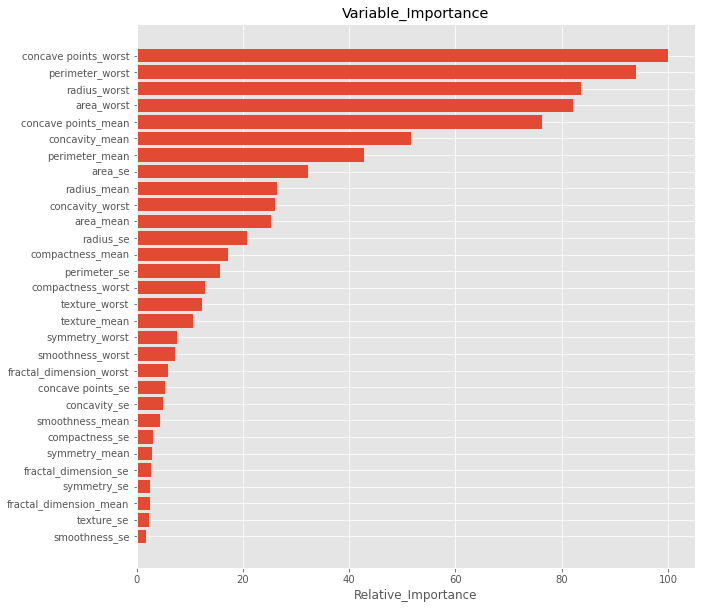

In [67]:
# Plotting the feature importance

import matplotlib.pyplot as plt


sorted_indices = np.argsort(feature_imp)
pos = np.arange(sorted_indices.shape[0]) + 0.5
plt.barh(pos, feature_imp[sorted_indices], align='center')
plt.yticks(pos,X.columns[sorted_indices])
plt.xlabel('Relative_Importance')
plt.title('Variable_Importance')
plt.rcParams['figure.figsize'] = [20,20]
plt.show()

In [68]:
# Predicting for the testing data

predictions_rf = fit_rf.predict(X_test)


In [70]:
# Creating the Confusion Matrix

from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(Y_test,predictions_rf)
conf_mat

array([[64,  3],
       [ 2, 45]], dtype=int64)

In [71]:
# Creating the Classification Report

from sklearn.metrics import classification_report
print(classification_report(Y_test, predictions_rf))


              precision    recall  f1-score   support

           0       0.97      0.96      0.96        67
           1       0.94      0.96      0.95        47

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



In [ ]:
# From the above table, we find

# Accuracy  ---> 96%
# Precision ---> 94%
# Recall    ---> 96%
# Specificity--> 96%
# F1-Score   --> 95%

# Here Y=1 --> the Cancer is Malignant
# and  Y=0 --> the Cancer is Benign

# So Recall = 96% means out of Actual Malignant Cancer patients, 96% are accurately predicted as Malignant

In [74]:
# Calculating the Area Under the ROC Curve (AUC)

from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
auc = roc_auc_score(Y_test, predictions_rf)
auc

0.9563353445538266

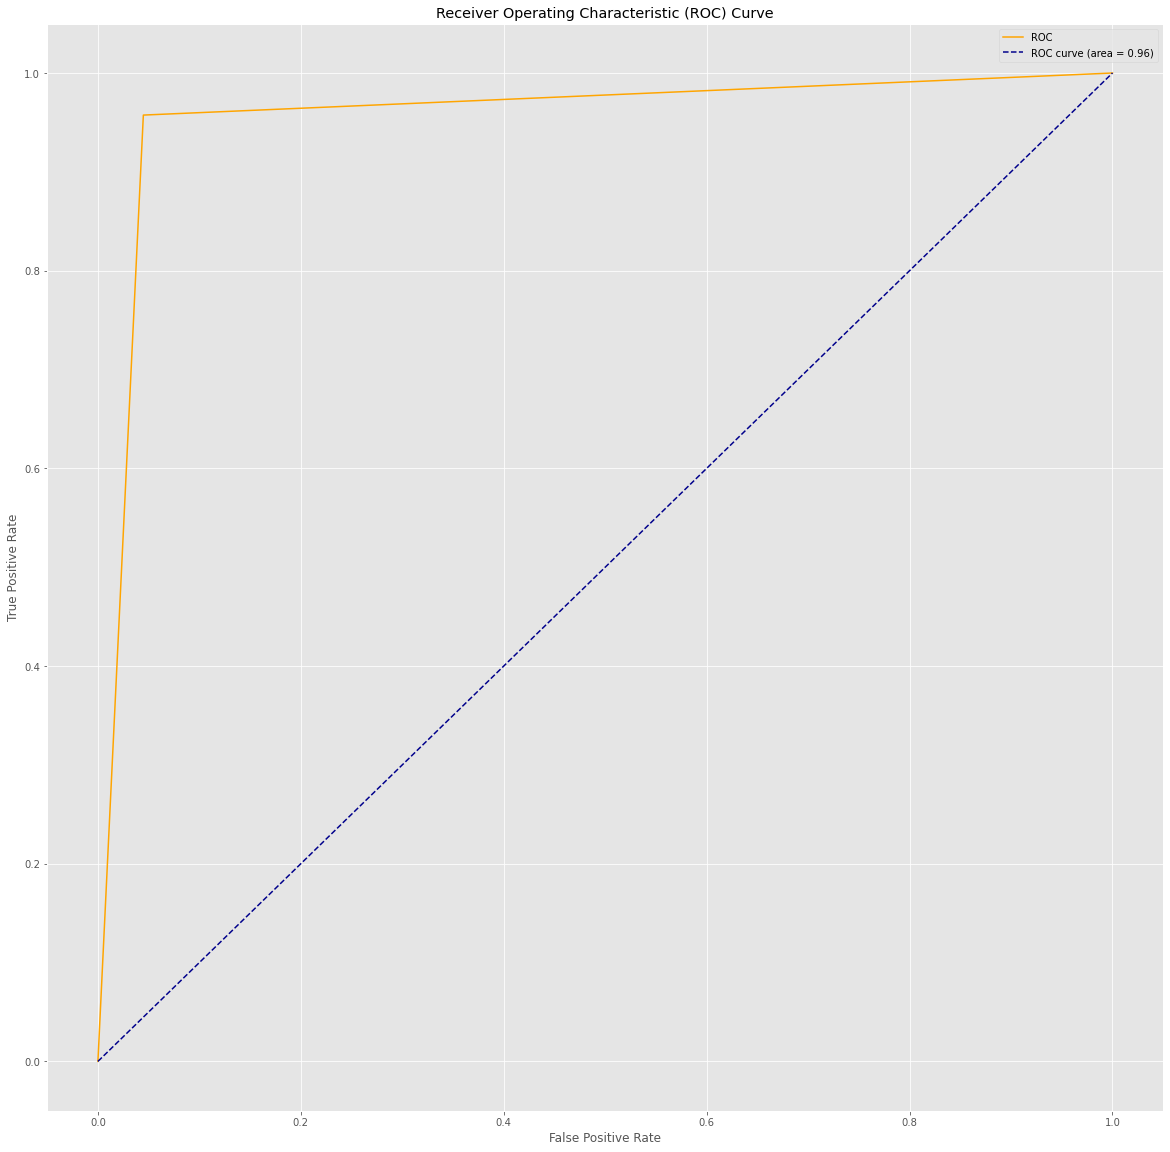

In [75]:
# ROC Curve

fpr, tpr, thresholds = roc_curve(Y_test, predictions_rf)

plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()